In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from lane_detection_functions import detect_lines, draw_lines, detect_lanes, draw_lanes

In [ ]:

# Canny Thresholds	30, 100	--> 40, 120	Made edge detection slightly stricter to reduce noise while keeping contrast
# Hough threshold	20	--> 60	Increased minimum votes required to accept a line → reduces weak/noisy lines
# minLineLength	30	--> 70	Prevented small, irrelevant line fragments from being accepted
# maxLineGap	20	--> 10	Reduced allowed gaps between points on a line to prevent false merging

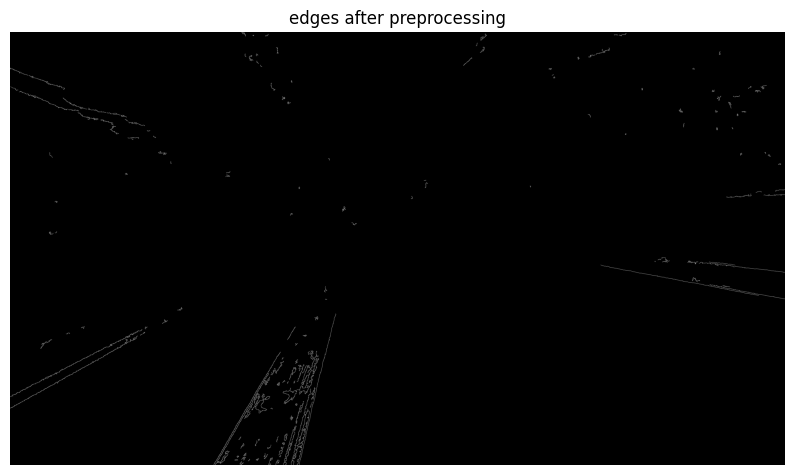

In [18]:
img = cv2.imread('p1_img.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
eq = cv2.equalizeHist(blur)
edges = cv2.Canny(eq, 40, 120, apertureSize=3)

plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title("edges after preprocessing")
plt.axis('off')
plt.show()



Number of lines detected: 43


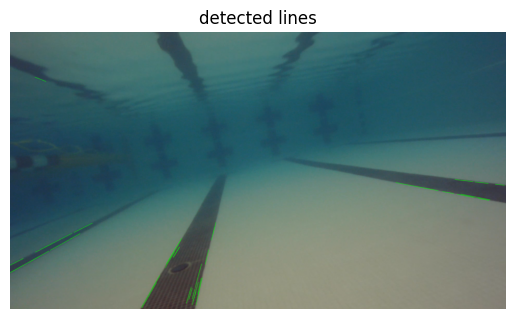

In [29]:
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi / 180,
    threshold=60,
    minLineLength=70,
    maxLineGap=10
)
print(f"Number of lines detected: {len(lines)}")

img_with_lines = draw_lines(img, lines)
plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
plt.title("detected lines")
plt.axis('off')
plt.show()



Number of lanes detected: 57


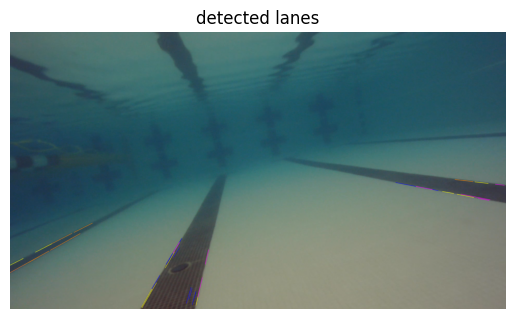

In [30]:
lanes = detect_lanes(lines)
print(f"Number of lanes detected: {len(lanes)}")

img_with_lanes = draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(img_with_lanes, cv2.COLOR_BGR2RGB))
plt.title("detected lanes")
plt.axis('off')
plt.show()